<a href="https://colab.research.google.com/github/mohamedxxhechxxbenxxhadid/tactic_sense/blob/sarra/ModelingBO1_tectic_sense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Load data
df = pd.read_csv('/content/sample_data/players_22.csv')


In [2]:
# ========== STEP 2: STATISTICAL ANALYSIS ==========
print("\n=== Summary Statistics ===")
df.describe()


=== Summary Statistics ===


,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,2850.000000,2850.00000,2850.000000,2.832000e+03,2835.00000,2850.000000,2850.000000,2850.000000,2835.000000,2835.000000,...,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,300.000000
mean,211391.234386,76.62386,78.529474,1.300955e+07,37073.66843,27.900351,181.841404,76.419649,21890.236684,1.061728,...,71.389123,55.335789,55.656491,52.437895,17.528772,17.290526,17.049123,17.459649,17.678947,45.350000
std,25112.405788,3.38885,4.310355,1.630674e+07,38426.77401,4.044665,6.892503,7.228704,43031.979993,0.242166,...,9.122147,22.006458,23.685807,23.848088,20.677046,19.805295,19.041356,20.421582,21.135253,8.723215
min,41.000000,73.00000,73.000000,3.500000e+05,500.00000,18.000000,158.000000,55.000000,1.000000,1.000000,...,18.000000,5.000000,7.000000,8.000000,2.000000,2.000000,2.000000,2.000000,2.000000,17.000000
25%,198167.000000,74.00000,75.000000,3.900000e+06,15000.00000,25.000000,177.000000,71.000000,73.000000,1.000000,...,67.000000,36.000000,33.000000,29.000000,8.000000,8.000000,8.000000,8.000000,8.000000,41.000000
50%,213430.000000,76.00000,78.000000,7.500000e+06,26000.00000,28.000000,182.000000,76.000000,450.000000,1.000000,...,73.000000,65.000000,68.000000,63.000000,11.000000,11.000000,11.000000,11.000000,11.000000,46.000000
75%,230171.750000,78.00000,81.750000,1.550000e+07,44000.00000,31.000000,187.000000,81.000000,1879.000000,1.000000,...,77.000000,74.000000,76.000000,73.000000,14.000000,14.000000,14.000000,14.000000,14.000000,51.000000
max,263287.000000,93.00000,95.000000,1.940000e+08,350000.00000,43.000000,201.000000,103.000000,115530.000000,3.000000,...,96.000000,93.000000,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000,65.000000


In [3]:
# Vérifier combien de valeurs nulles par colonne
print(df.isnull().sum())
print(f"Number of null values : {df.isnull().sum().sum()}")



sofifa_id              0
player_url             0
short_name             0
long_name              0
player_positions       0
                    ... 
player_face_url        0
club_logo_url         16
club_flag_url         16
nation_logo_url     2357
nation_flag_url        1
Length: 110, dtype: int64
Number of null values : 19588


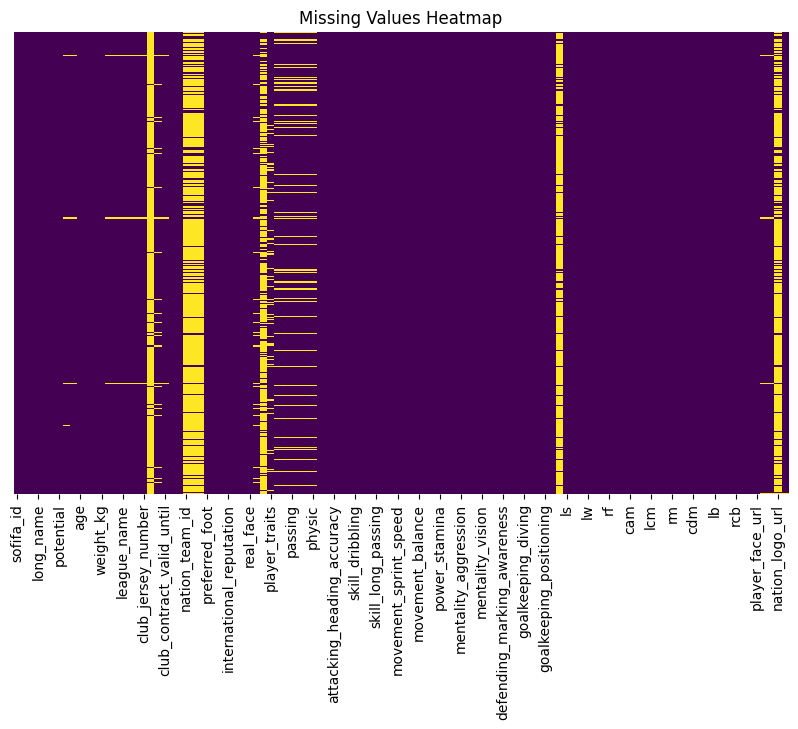

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [5]:


# Identifier les colonnes essentielles pour le modèle
essential_columns = [
    'short_name', 'height_cm', 'weight_kg', 'age',  # Infos d'identification du joueur
    'overall', 'potential', 'pace', 'shooting', 'passing', 'dribbling',
    'defending', 'physic', 'attacking_finishing', 'skill_dribbling', 'player_positions',
    'mentality_vision', 'mentality_composure',
    'club_name', 'league_name', 'preferred_foot', 'work_rate', 'body_type',
    'release_clause_eur', 'club_position', 'defending_standing_tackle',
    'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_positioning'
]


# Garder uniquement les lignes où les colonnes essentielles ne sont pas nulles
df_cleaned = df[essential_columns].dropna()

# Vérifier le nombre de lignes après la suppression des valeurs manquantes dans les colonnes essentielles
print(f"Number of rows after cleaning : {df_cleaned.shape[0]}")


Number of rows after cleaning : 2392


**Distribution of Performance Metrics**

In [6]:
# 📌 1. Statistiques descriptives
df[essential_columns].describe()


,height_cm,weight_kg,age,overall,potential,pace,shooting,passing,dribbling,defending,physic,attacking_finishing,skill_dribbling,mentality_vision,mentality_composure,release_clause_eur,defending_standing_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_positioning
count,2850.000000,2850.000000,2850.000000,2850.00000,2850.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2850.000000,2850.000000,2850.000000,2850.000000,2.679000e+03,2850.000000,2850.000000,2850.000000,2850.000000
mean,181.841404,76.419649,27.900351,76.62386,78.529474,71.367843,63.630980,68.863137,72.906275,60.311373,71.692157,55.992632,66.222456,65.692281,71.389123,2.505075e+07,55.656491,17.528772,17.290526,17.459649
std,6.892503,7.228704,4.044665,3.38885,4.310355,11.924388,13.521756,8.073982,7.844972,17.590575,8.124940,21.328161,19.686958,13.091185,9.122147,3.212072e+07,23.685807,20.677046,19.805295,20.421582
min,158.000000,55.000000,18.000000,73.00000,73.000000,30.000000,20.000000,35.000000,35.000000,19.000000,35.000000,5.000000,7.000000,11.000000,18.000000,4.730000e+05,7.000000,2.000000,2.000000,2.000000
25%,177.000000,71.000000,25.000000,74.00000,75.000000,65.000000,55.250000,65.000000,69.000000,43.000000,67.000000,42.000000,64.000000,59.000000,67.000000,7.000000e+06,33.000000,8.000000,8.000000,8.000000
50%,182.000000,76.000000,28.000000,76.00000,78.000000,73.000000,68.000000,70.000000,74.000000,69.000000,73.000000,63.000000,73.000000,69.000000,73.000000,1.360000e+07,68.000000,11.000000,11.000000,11.000000
75%,187.000000,81.000000,31.000000,78.00000,81.750000,80.000000,74.000000,74.000000,78.000000,74.000000,78.000000,73.000000,78.000000,75.000000,77.000000,2.975000e+07,76.000000,14.000000,14.000000,14.000000
max,201.000000,103.000000,43.000000,93.00000,95.000000,97.000000,94.000000,93.000000,95.000000,91.000000,90.000000,95.000000,96.000000,95.000000,96.000000,3.735000e+08,93.000000,91.000000,92.000000,92.000000


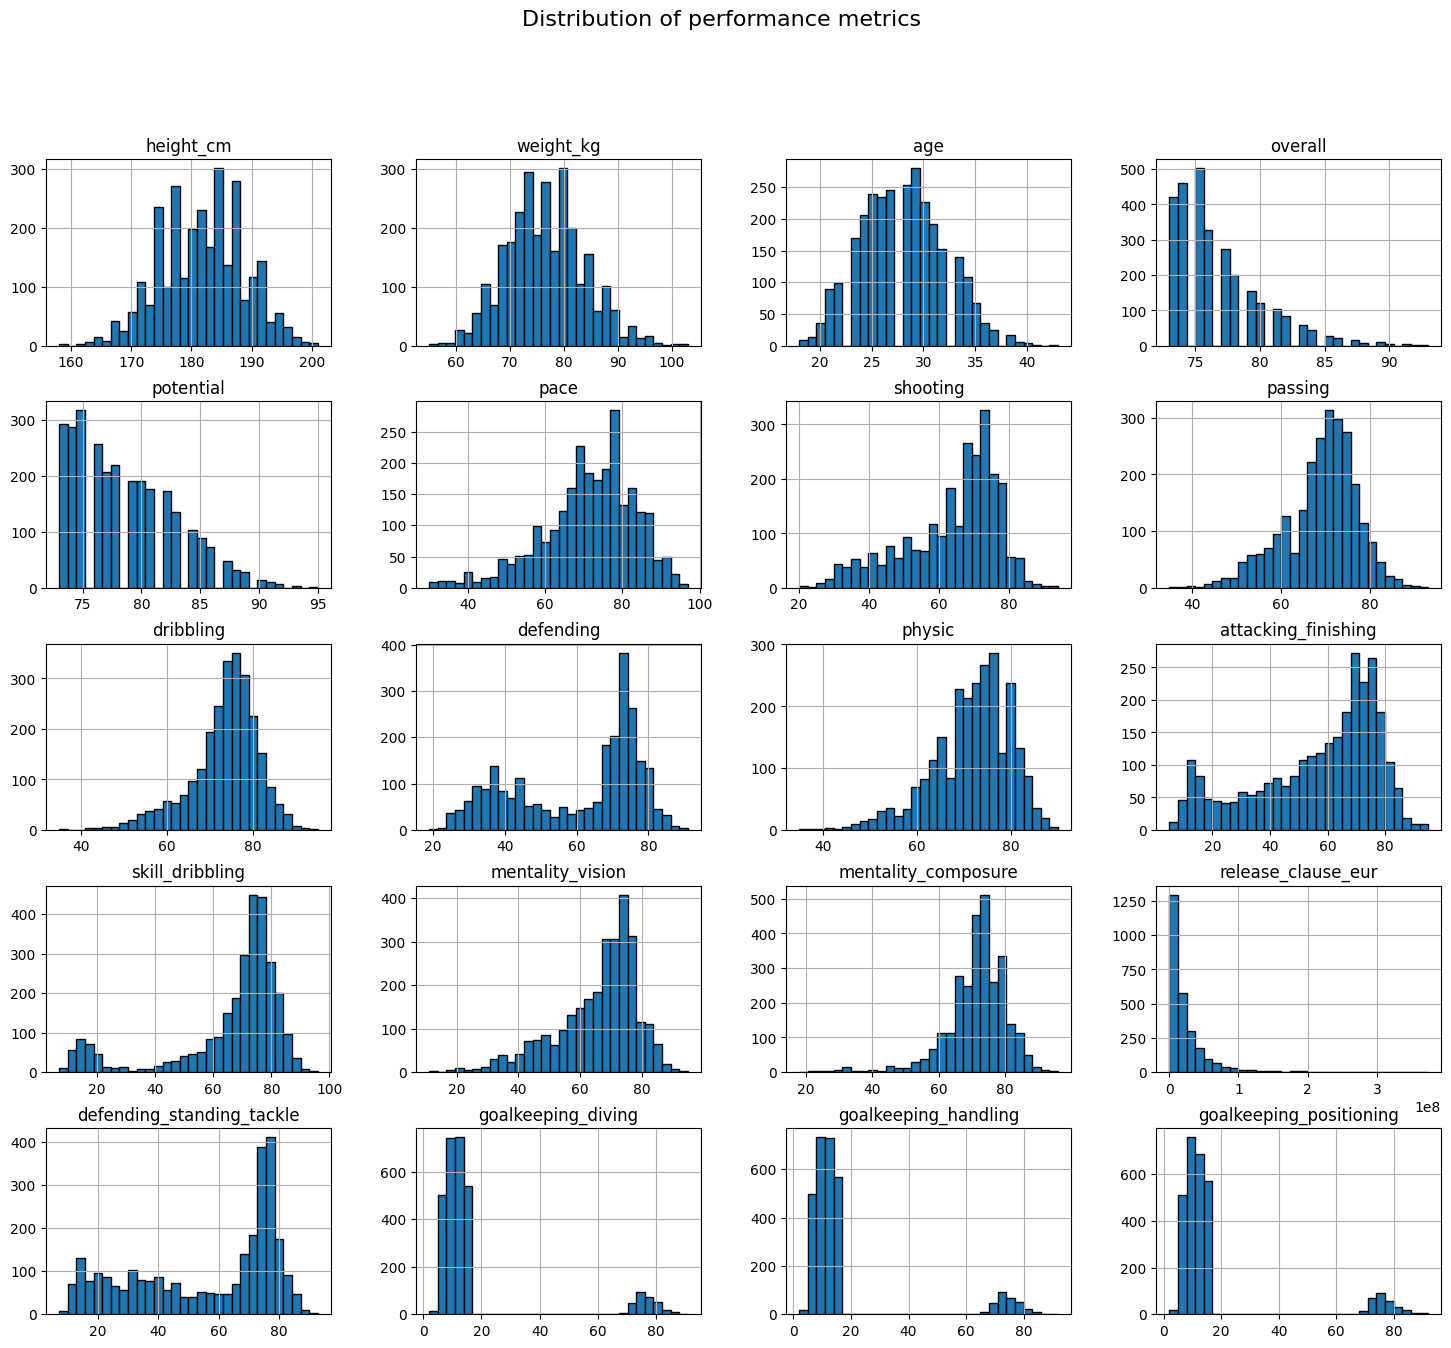

In [7]:
# 📌 2. Histogrammes pour voir la distribution
df[essential_columns].hist(figsize=(18,15), bins=30, edgecolor='black')
plt.suptitle("Distribution of performance metrics", fontsize=16)
plt.show()

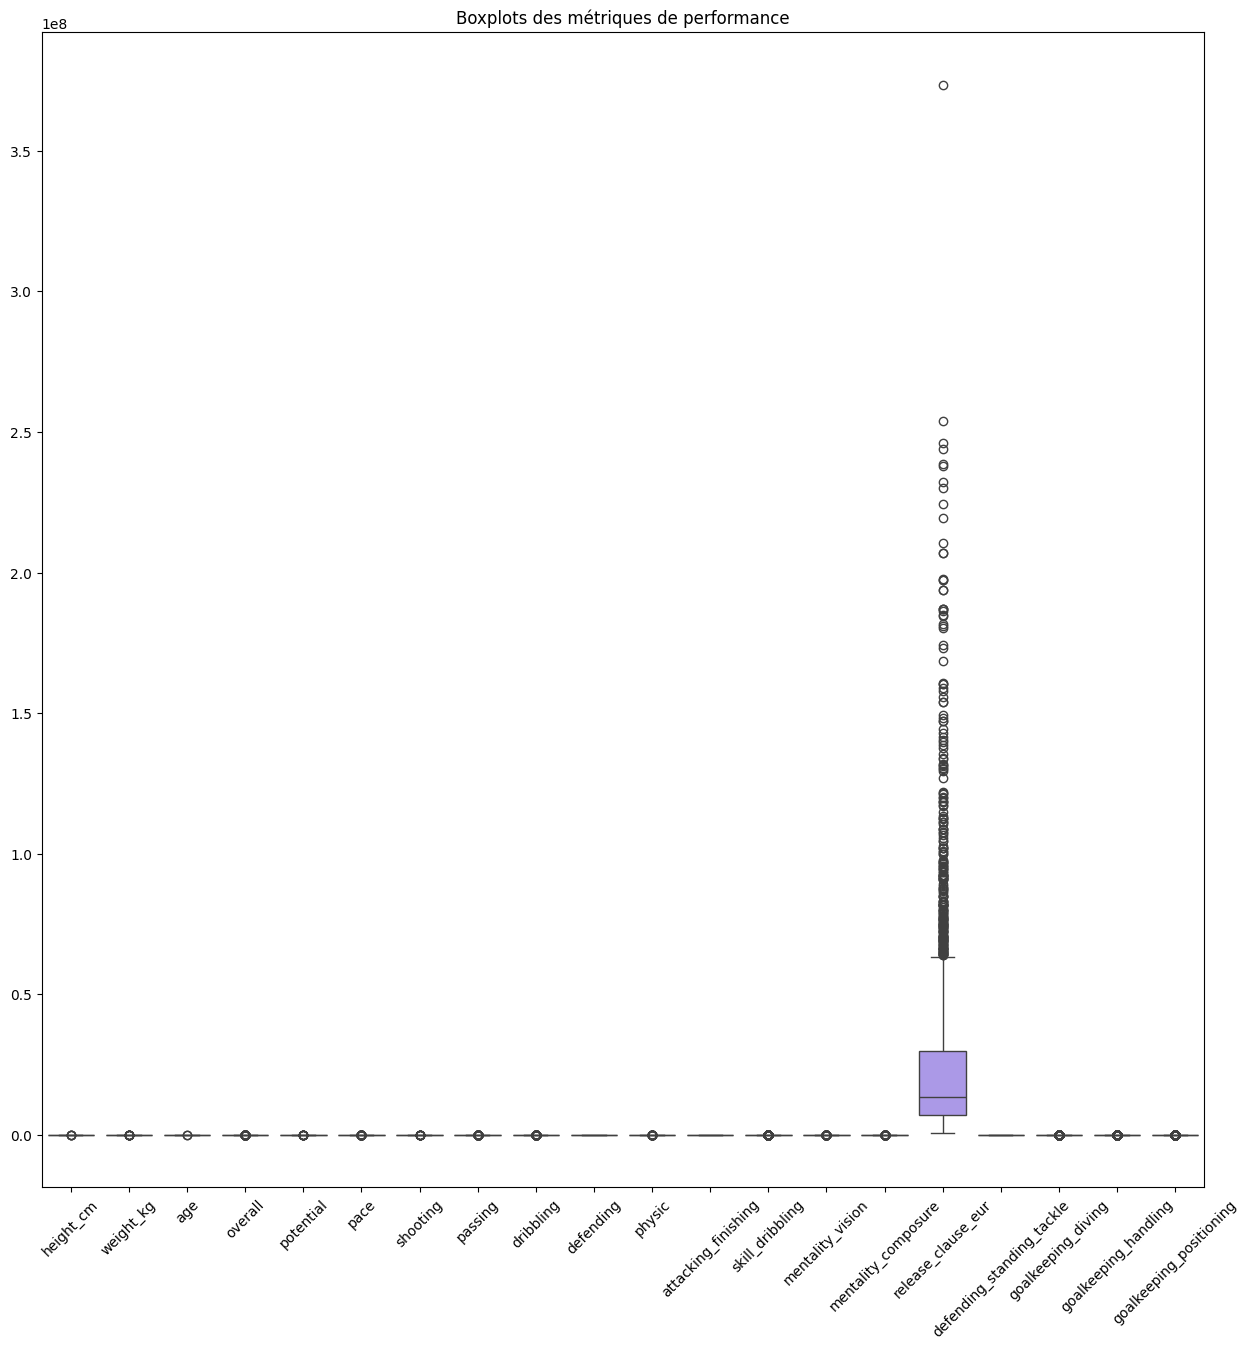

In [8]:
# 📌 3. Boxplots pour détecter les outliers
plt.figure(figsize=(15, 15))
sns.boxplot(data=df[essential_columns])
plt.xticks(rotation=45)
plt.title("Boxplots des métriques de performance")
plt.show()

Ratio de potentiel par rapport à la note globale :ce ratio est valable pour tous les joueurs, indépendamment de leur poste.


In [9]:

df_cleaned['potential_to_overall_ratio'] = df_cleaned['potential'] / df_cleaned['overall']


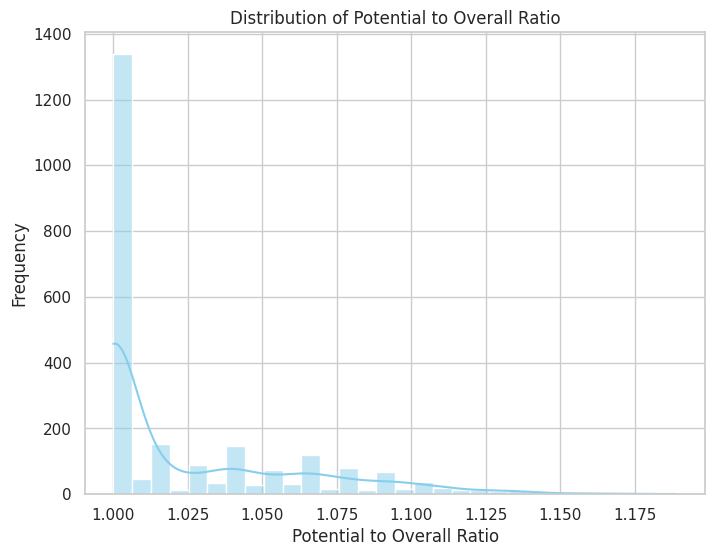

In [10]:
# Set the plot style
sns.set(style="whitegrid")

# Create a figure
plt.figure(figsize=(8, 6))

# Plot the histogram with KDE for potential_to_overall_ratio
sns.histplot(df_cleaned['potential_to_overall_ratio'], bins=30, kde=True, color='skyblue')

# Add titles and labels
plt.title('Distribution of Potential to Overall Ratio')
plt.xlabel('Potential to Overall Ratio')
plt.ylabel('Frequency')

# Show the plot
plt.show()

Analyse de l'âge par rapport au physique : L'âge d'un joueur a une importance cruciale sur son physique
, indépendamment du poste.

In [11]:
df_cleaned['age_to_physic_ratio'] = df_cleaned['age'] / df_cleaned['physic']


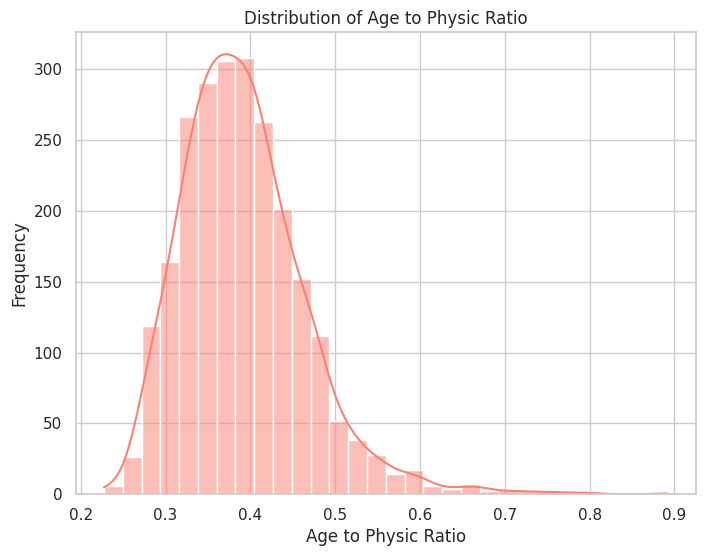

In [12]:
# Create a figure
plt.figure(figsize=(8, 6))

# Plot the histogram with KDE for age_to_physic_ratio
sns.histplot(df_cleaned['age_to_physic_ratio'], bins=30, kde=True, color='salmon')

# Add titles and labels
plt.title('Distribution of Age to Physic Ratio')
plt.xlabel('Age to Physic Ratio')
plt.ylabel('Frequency')

# Show the plot
plt.show()

**Caractéristiques spécifiques au poste**

Attaquants : Les caractéristiques importantes pour les attaquants incluent généralement shooting, pace, dribbling, attacking_finishing, etc.

In [13]:
df_cleaned['attacker_score'] = (df_cleaned['shooting'] * 0.4 + df_cleaned['pace'] * 0.3 + df_cleaned['dribbling'] * 0.3)


Milieux de terrain : Les milieux de terrain sont souvent jugés sur leur capacité à distribuer le ballon, leur vision du jeu, et leur agilité. ON peux donc utiliser des caractéristiques comme passing, dribbling, mentality_vision, et movement_balance.

In [14]:
df_cleaned['midfielder_score'] = (df_cleaned['passing'] * 0.4 + df_cleaned['dribbling'] * 0.3 + df_cleaned['mentality_vision'] * 0.3)


Défenseurs : Les défenseurs sont jugés en grande partie sur leurs capacités défensives et leur physique. Il serait pertinent de prendre en compte defending, physic, defending_standing_tackle, defending_marking_awareness, et movement_reactions.

In [15]:
df_cleaned['defender_score'] = (df_cleaned['defending'] * 0.4 + df_cleaned['physic'] * 0.3 + df_cleaned['defending_standing_tackle'] * 0.3)


Gardien de but : Les gardiens se jugent sur leurs performances en termes de réflexes, positionnement, et plongées. On peux utiliser des caractéristiques comme goalkeeping_diving, goalkeeping_handling, et goalkeeping_positioning

In [16]:
df_cleaned['goalkeeper_score'] = (df_cleaned['goalkeeping_diving'] * 0.4 + df_cleaned['goalkeeping_handling'] * 0.3 + df_cleaned['goalkeeping_positioning'] * 0.3)


In [17]:

# Fonction pour classifier les joueurs selon leur poste principal
def get_position(pos):
    if 'ST' in pos or 'LW' in pos or 'RW' in pos:
        return 'Attacker'
    elif 'CM' in pos or 'CAM' in pos or 'CDM' in pos:
        return 'Midfielder'
    elif 'CB' in pos or 'RB' in pos or 'LB' in pos:
        return 'Defender'
    elif 'GK' in pos:
        return 'Goalkeeper'
    else:
        return 'Other'

In [18]:
# Appliquer la classification sur la colonne player_positions
df_cleaned['position'] = df_cleaned['player_positions'].apply(get_position)

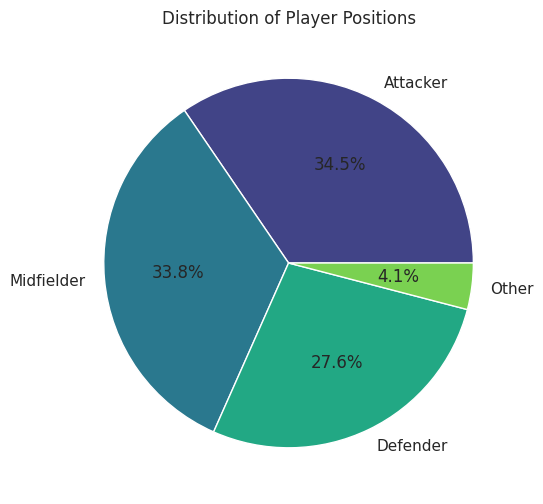

In [19]:
# Count the number of players in each position category
position_counts = df_cleaned['position'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(position_counts, labels=position_counts.index, autopct="%1.1f%%", colors=sns.color_palette("viridis", len(position_counts)))
plt.title("Distribution of Player Positions")
plt.show()

In [20]:

# Fonction pour attribuer le label "talented" en fonction du poste
def assign_talent(row):
    if row['position'] == 'Attacker' and row['attacker_score'] > 75:
        return 'Talented'
    elif row['position'] == 'Midfielder' and row['midfielder_score'] > 70:
        return 'Talented'
    elif row['position'] == 'Defender' and row['defender_score'] > 70:
        return 'Talented'
    elif row['position'] == 'Goalkeeper' and row['goalkeeper_score'] > 70:
        return 'Talented'
    else:
        return 'Not Talented'

# Appliquer la logique de talent
df_cleaned['talented'] = df_cleaned.apply(assign_talent, axis=1)




In [21]:
print("Original dataset distribution:\n", df_cleaned['talented'].value_counts())


Original dataset distribution:
 talented
Talented        1708
Not Talented     684
Name: count, dtype: int64


In [22]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split

X = df_cleaned[['attacker_score', 'midfielder_score', 'defender_score', 'goalkeeper_score']]  # Features
y = df_cleaned['talented']  # Target

# Split data before applying SMOTEENN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

print("Before balancing:", y_train.value_counts())
print("After balancing:", pd.Series(y_resampled).value_counts())


Before balancing: talented
Talented        1372
Not Talented     541
Name: count, dtype: int64
After balancing: talented
Not Talented    976
Talented        772
Name: count, dtype: int64


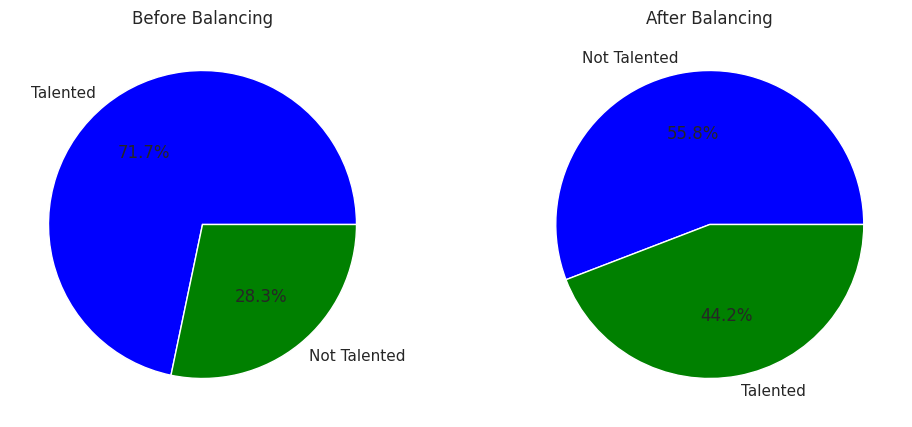

In [23]:

# Count occurrences before and after balancing
before_counts = y_train.value_counts()
after_counts = pd.Series(y_resampled).value_counts()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Pie chart before balancing (percentages)
axes[0].pie(before_counts, labels=before_counts.index, autopct=lambda p: f"{p:.1f}%", colors=['blue', 'green'])
axes[0].set_title("Before Balancing")

# Pie chart after balancing (percentages)
axes[1].pie(after_counts, labels=after_counts.index, autopct=lambda p: f"{p:.1f}%", colors=['blue', 'green'])
axes[1].set_title("After Balancing")

plt.show()

In [24]:
print(df_cleaned.columns)
print(df_cleaned.head())


Index(['short_name', 'height_cm', 'weight_kg', 'age', 'overall', 'potential',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_finishing', 'skill_dribbling', 'player_positions',
       'mentality_vision', 'mentality_composure', 'club_name', 'league_name',
       'preferred_foot', 'work_rate', 'body_type', 'release_clause_eur',
       'club_position', 'defending_standing_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_positioning',
       'potential_to_overall_ratio', 'age_to_physic_ratio', 'attacker_score',
       'midfielder_score', 'defender_score', 'goalkeeper_score', 'position',
       'talented'],
      dtype='object')
          short_name  height_cm  weight_kg  age  overall  potential  pace  \
0           L. Messi        170         72   34       93         93  85.0   
1     R. Lewandowski        185         81   32       92         92  78.0   
2  Cristiano Ronaldo        187         83   36       91         91

In [25]:
# Convert 'talented' column to binary format
df_cleaned['talented'] = df_cleaned['talented'].map({'Talented': 1, 'Not Talented': 0})

In [26]:
print(df_cleaned.head())


          short_name  height_cm  weight_kg  age  overall  potential  pace  \
0           L. Messi        170         72   34       93         93  85.0   
1     R. Lewandowski        185         81   32       92         92  78.0   
2  Cristiano Ronaldo        187         83   36       91         91  87.0   
3          Neymar Jr        175         68   29       91         91  91.0   
4       K. De Bruyne        181         70   30       91         91  76.0   

   shooting  passing  dribbling  ...  goalkeeping_handling  \
0      92.0     91.0       95.0  ...                    11   
1      92.0     79.0       86.0  ...                     6   
2      94.0     80.0       88.0  ...                    11   
3      83.0     86.0       94.0  ...                     9   
4      86.0     93.0       88.0  ...                    13   

   goalkeeping_positioning  potential_to_overall_ratio  age_to_physic_ratio  \
0                       14                         1.0             0.523077   
1     

In [27]:
df_cleaned['position'].unique()


array(['Attacker', 'Midfielder', 'Defender', 'Other'], dtype=object)

In [28]:
# One-hot encode the 'position' column
position_encoded = pd.get_dummies(df_cleaned['position'], prefix='position')

# Convert boolean values to binary (1/0)
position_encoded = position_encoded.astype(int)

# Concatenate the new encoded columns with the original DataFrame
df_cleaned = pd.concat([df_cleaned, position_encoded], axis=1)

# Optionally drop the original 'position' column
df_cleaned.drop('position', axis=1, inplace=True)


In [29]:
print(df_cleaned.head())

          short_name  height_cm  weight_kg  age  overall  potential  pace  \
0           L. Messi        170         72   34       93         93  85.0   
1     R. Lewandowski        185         81   32       92         92  78.0   
2  Cristiano Ronaldo        187         83   36       91         91  87.0   
3          Neymar Jr        175         68   29       91         91  91.0   
4       K. De Bruyne        181         70   30       91         91  76.0   

   shooting  passing  dribbling  ...  age_to_physic_ratio  attacker_score  \
0      92.0     91.0       95.0  ...             0.523077            90.8   
1      92.0     79.0       86.0  ...             0.390244            86.0   
2      94.0     80.0       88.0  ...             0.480000            90.1   
3      83.0     86.0       94.0  ...             0.460317            88.7   
4      86.0     93.0       88.0  ...             0.384615            83.6   

   midfielder_score  defender_score goalkeeper_score  talented  \
0       

In [30]:
# Sauvegarde du fichier CSV
df_cleaned.to_csv('players_with_talent.csv', index=False)

Modeling

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [32]:


# ------------------------
# Feature / Target split
# ------------------------
# Drop leakage score columns and text columns
X = df_cleaned.drop(columns=[
    'talented',
    'short_name', 'player_positions', 'club_name', 'league_name',
    'preferred_foot', 'work_rate', 'body_type', 'club_position',
    'attacker_score', 'midfielder_score', 'defender_score', 'goalkeeper_score'
], errors='ignore')

# Keep only numeric features
X = X.select_dtypes(include=['number'])
y = df_cleaned['talented']

# ------------------------
# Train/test split
# ------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ------------------------
# Scaling (fit on train, transform both)
# ------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# ------------------------
# Helper functions
# ------------------------
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"\n=== {name} ===")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))

def cross_validate_model(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')
    print(f"Cross-validated ROC AUC: {scores.mean():.4f} ± {scores.std():.4f}")


In [33]:
# ------------------------
# Logistic Regression
# ------------------------
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
evaluate_model("Logistic Regression", logreg, X_test, y_test)
cross_validate_model(logreg, X_train, y_train)

# ------------------------
# Random Forest (Tuned)
# ------------------------
param_grid_rf = {
    'n_estimators': [100],
    'max_depth': [5, 10]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='roc_auc')
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
evaluate_model("Tuned Random Forest", best_rf, X_test, y_test)
cross_validate_model(best_rf, X_train, y_train)

# ------------------------
# Decision Tree
# ------------------------
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)
dt.fit(X_train, y_train)
evaluate_model("Decision Tree", dt, X_test, y_test)
cross_validate_model(dt, X_train, y_train)

# ------------------------
# XGBoost
# ------------------------
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', max_depth=3, reg_lambda=1)
xgb.fit(X_train, y_train)
evaluate_model("XGBoost", xgb, X_test, y_test)
cross_validate_model(xgb, X_train, y_train)

# ------------------------
# SVM
# ------------------------
svm = SVC(kernel='rbf', C=1.0, probability=True)
svm.fit(X_train, y_train)
evaluate_model("SVM", svm, X_test, y_test)
cross_validate_model(svm, X_train, y_train)

# ------------------------
# Deep Learning Model
# ------------------------
model_dl = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model_dl.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model_dl.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

loss, acc = model_dl.evaluate(X_test, y_test, verbose=0)
print(f"\n=== Deep Learning Model ===\nAccuracy: {acc:.4f}")


=== Logistic Regression ===
Accuracy: 0.8831
              precision    recall  f1-score   support

           0       0.87      0.69      0.77       137
           1       0.89      0.96      0.92       342

    accuracy                           0.88       479
   macro avg       0.88      0.83      0.85       479
weighted avg       0.88      0.88      0.88       479

Cross-validated ROC AUC: 0.8993 ± 0.0138

=== Tuned Random Forest ===
Accuracy: 0.9478
              precision    recall  f1-score   support

           0       0.96      0.85      0.90       137
           1       0.94      0.99      0.96       342

    accuracy                           0.95       479
   macro avg       0.95      0.92      0.93       479
weighted avg       0.95      0.95      0.95       479

Cross-validated ROC AUC: 0.9884 ± 0.0037

=== Decision Tree ===
Accuracy: 0.9311
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       137
           1       0.94

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:10:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:10:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:10:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:10:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== XGBoost ===
Accuracy: 0.9687
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       137
           1       0.97      0.99      0.98       342

    accuracy                           0.97       479
   macro avg       0.97      0.96      0.96       479
weighted avg       0.97      0.97      0.97       479



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:10:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:10:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Cross-validated ROC AUC: 0.9934 ± 0.0015

=== SVM ===
Accuracy: 0.9478
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       137
           1       0.95      0.98      0.96       342

    accuracy                           0.95       479
   macro avg       0.95      0.92      0.93       479
weighted avg       0.95      0.95      0.95       479

Cross-validated ROC AUC: 0.9799 ± 0.0026
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5893 - loss: 0.6675 - val_accuracy: 0.7050 - val_loss: 0.5022
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7700 - loss: 0.4666 - val_accuracy: 0.8172 - val_loss: 0.3908
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8393 - loss: 0.3793 - val_accuracy: 0.8721 - val_loss: 0.3150
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8594 - loss: 0.3409 - val_accuracy: 0.8799 - val_loss: 0.2747
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8715 - loss: 0.2967 - val_accuracy: 0.8956 - val_loss: 0.2466
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8973 - loss: 0.2551 - val_accuracy: 0.9112 - val_loss: 0.2272
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9022 - loss: 0.2286 - val_accuracy: 0.9086 - val_loss: 0.2165
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9084 - loss: 0.2233 - val_accuracy: 0.9138 - val_loss: 0.2057
Ep

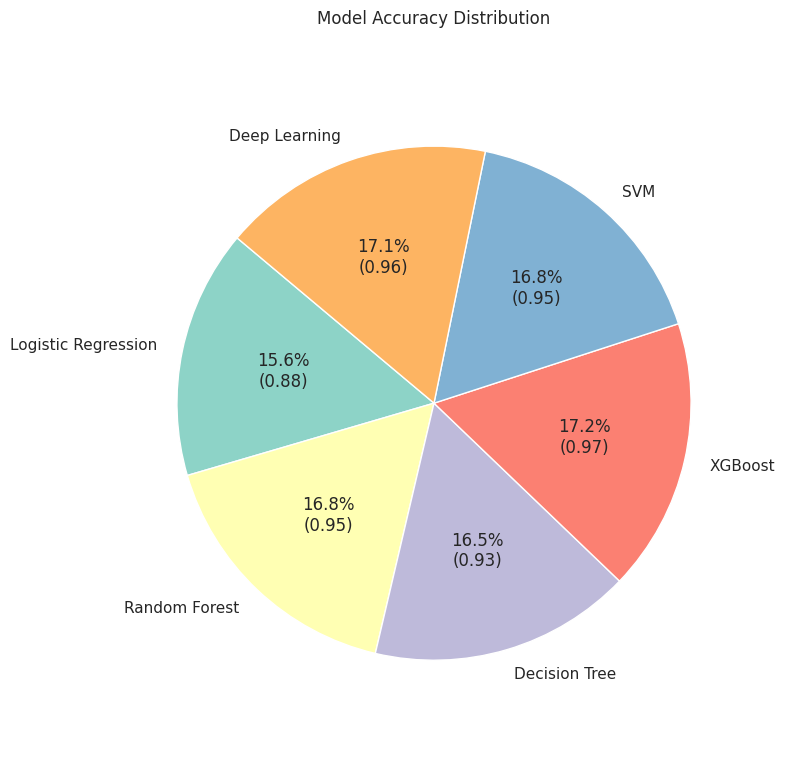

In [34]:
# ------------------------
# Accuracy Pie Chart
# ------------------------
model_scores_acc = {
    "Logistic Regression": accuracy_score(y_test, logreg.predict(X_test)),
    "Random Forest": accuracy_score(y_test, best_rf.predict(X_test)),
    "Decision Tree": accuracy_score(y_test, dt.predict(X_test)),
    "XGBoost": accuracy_score(y_test, xgb.predict(X_test)),
    "SVM": accuracy_score(y_test, svm.predict(X_test)),
    "Deep Learning": acc  # From model_dl.evaluate
}

# Labels and values
labels = list(model_scores_acc.keys())
sizes = list(model_scores_acc.values())

# Format values to be shown as percentages in the pie
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = pct * total / 100.0
        return f'{pct:.1f}%\n({val:.2f})'
    return my_autopct

# Plot pie
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct=make_autopct(sizes), startangle=140, colors=plt.cm.Set3.colors)
plt.title("Model Accuracy Distribution")
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.tight_layout()
plt.show()


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


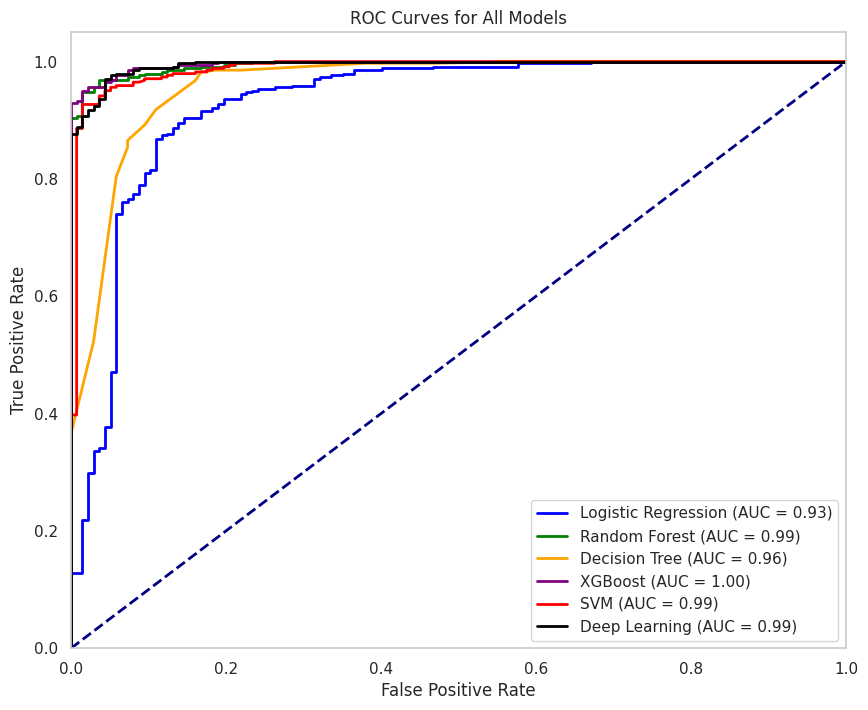

In [35]:
from sklearn.metrics import roc_curve, auc

# Compute ROC for all models
def get_roc(model, name, color):
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.figure(figsize=(10, 8))

# Add ROC curves
get_roc(logreg, "Logistic Regression", 'blue')
get_roc(best_rf, "Random Forest", 'green')
get_roc(dt, "Decision Tree", 'orange')
get_roc(xgb, "XGBoost", 'purple')
get_roc(svm, "SVM", 'red')

# Deep learning (special case)
y_score_dl = model_dl.predict(X_test).ravel()
fpr_dl, tpr_dl, _ = roc_curve(y_test, y_score_dl)
roc_auc_dl = auc(fpr_dl, tpr_dl)
plt.plot(fpr_dl, tpr_dl, color='black', lw=2, label=f'Deep Learning (AUC = {roc_auc_dl:.2f})')

# Plot aesthetics
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print(classification_report(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]))


              precision    recall  f1-score   support

           0       0.87      0.69      0.77       137
           1       0.89      0.96      0.92       342

    accuracy                           0.88       479
   macro avg       0.88      0.83      0.85       479
weighted avg       0.88      0.88      0.88       479

ROC AUC: 0.9287787595509456


In [37]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300, max_depth=15, min_samples_split=5, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))


              precision    recall  f1-score   support

           0       0.97      0.85      0.90       137
           1       0.94      0.99      0.96       342

    accuracy                           0.95       479
   macro avg       0.95      0.92      0.93       479
weighted avg       0.95      0.95      0.95       479

ROC AUC: 0.9947283049472831


In [38]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print(classification_report(y_test, y_pred_dt))
print("ROC AUC:", roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1]))


              precision    recall  f1-score   support

           0       0.90      0.86      0.88       137
           1       0.95      0.96      0.95       342

    accuracy                           0.93       479
   macro avg       0.92      0.91      0.92       479
weighted avg       0.93      0.93      0.93       479

ROC AUC: 0.911651086353353


In [39]:
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print(classification_report(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1]))


              precision    recall  f1-score   support

           0       0.98      0.91      0.94       137
           1       0.97      0.99      0.98       342

    accuracy                           0.97       479
   macro avg       0.97      0.95      0.96       479
weighted avg       0.97      0.97      0.97       479

ROC AUC: 0.9973961668160669


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:10:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [40]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

svm = make_pipeline(StandardScaler(), SVC(kernel='rbf', probability=True))
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print(classification_report(y_test, y_pred_svm))
print("ROC AUC:", roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1]))


              precision    recall  f1-score   support

           0       0.94      0.87      0.90       137
           1       0.95      0.98      0.96       342

    accuracy                           0.95       479
   macro avg       0.95      0.92      0.93       479
weighted avg       0.95      0.95      0.95       479

ROC AUC: 0.9882827506723012


In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    tf.keras.Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stop])

loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)


Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6068 - loss: 0.6639 - val_accuracy: 0.7180 - val_loss: 0.5004
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7630 - loss: 0.4887 - val_accuracy: 0.7990 - val_loss: 0.4076
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8082 - loss: 0.4011 - val_accuracy: 0.8616 - val_loss: 0.3379
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8557 - loss: 0.3350 - val_accuracy: 0.8825 - val_loss: 0.2909
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8785 - loss: 0.2937 - val_accuracy: 0.8903 - val_loss: 0.2576
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8907 - loss: 0.2762 - val_accuracy: 0.8930 - val_loss: 0.2382
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9035 - loss: 0.2322 - val_accuracy: 0.9086 - val_loss: 0.2249
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8933 - loss: 0.2469 - val_accuracy: 0.9008 - v